<!--NOTEBOOK_HEADER-->
*This notebook contains course material from [CBE32338](https://jckantor.github.io/CBE32338)
by Jeffrey Kantor (jeff at nd.edu); the content is available [on Github](https://github.com/jckantor/CBE2338.git).
The text is released under the [CC-BY-NC-ND-4.0 license](https://creativecommons.org/licenses/by-nc-nd/4.0/legalcode),
and code is released under the [MIT license](https://opensource.org/licenses/MIT).*

# TCLab : Coding a relay controller

The purpose of this first laboratory session is to verify that you can interface and interact with the TCLab hardware, and familiarize you with the TCLab library. This exercise will be to code a rudimentary relay (also called 'on-off' or thermostat) controller for one of the two heaters.


## Verify that your hardware and software are working correctly.

The following cell should cause the LED on the TCLab shield to light up to 100% maximum brightness.

In [4]:
from tclab import TCLab

lab = TCLab()
lab.LED(100)

Opening connection
TCLab connected via Arduino on port COM5


50.0

## Code an on-off controller. 

Code an on-off controller for a setpoint of 40 degrees C using heater 1 as the manipulated variable, and temperature 1 as the measured variable. Operate the controller for at least 5 minutes (600 seconds), reporting time/power/temperature measurements every 2 seconds. 

In [8]:
# put your code here.

from labtime import clock

time = []
T1 = []
Q1 = []

tfinal = 600
tstep = 1

Torder=40
Terror=5

Q=0

print("Start control")

for t in clock(tfinal, tstep):
    print('.', end='')
    time = time + [t]
    T = lab.T1
    
    # Hysteresis control
    if T < (Torder - Terror/2):
        Q=100
        print("ON ", end='')
    elif T > (Torder + Terror/2):
        Q=0
        print("OFF", end='')
    else:
        Q=Q
    
    # Order
    lab.Q1(Q)
    
    # Store measures
    T1 = T1 + [T]
    Q1 = Q1 + [Q]
    
    
    
print("\nTurn Heater Q1 Off")
lab.Q1(0)

Start control
.ON .ON .ON .ON .ON .ON .ON .ON .ON .ON .ON .ON .ON .ON .ON .ON .ON .ON .ON .ON .ON .ON .ON .ON .ON .ON .ON .ON .ON .ON .ON .ON .ON .ON .ON .ON .ON .ON .ON .ON .ON .ON .ON .ON .ON .ON .ON .ON .ON .ON .ON .ON .ON .ON .ON .ON .ON .ON .ON .ON .ON .ON .ON .ON ............................OFF..OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.....................................................ON ....ON .ON .ON .ON .ON .ON .ON .ON .ON .ON .ON .ON .ON .ON ......................................OFF..OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF...........................................................ON ....ON .ON .ON .ON .ON .ON .ON .ON .ON .ON .ON .ON .......................................OFF..OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.OFF.

0.0

## Analysis

Examine the results of the previous exercise and answer the following questions.

1. Approximately how much time elapses between power on and power off events?

2. What is the approximate duty cycle (i.e, fraction of time the heater is in the 'on' state) once the initial start-up period has passed.

3. What is the size of the oscillation around the setpoint?  Why does this occur?

Write your answers in this markdown cell.

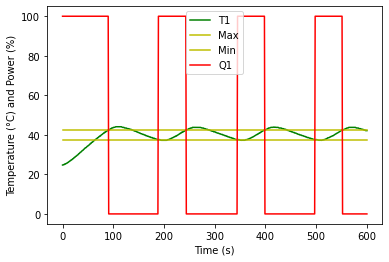

In [16]:

import matplotlib.pyplot as plt
import numpy as np

plt.plot(time, T1,'g-', label='T1')
plt.plot(time, (Torder+Terror/2)*np.ones(len(time)), 'y-', label='Max')
plt.plot(time, (Torder-Terror/2)*np.ones(len(time)), 'y-', label='Min')
plt.plot(time, Q1,'r-', label='Q1')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (°C) and Power (%)')
plt.legend()
plt.show()